INSA ROUEN <br>
MS ESD 2019-2020 <br>
Winnie VORIHILALA

# <center> TP : classification de spam </center>

Lien pour accéder au sujet de TP : https://who.rocq.inria.fr/Jean-Marc.Lasgouttes/mastere-esd/boosting/tp-boosting.pdf

# 1 - Introduction

On dispose d’un jeu de données spambase.data, créé par Hewlett Packard (HP) en 1999, qui décrit les caractéristiques de 4601 mails au travers de 58 variables. <br>
<br>
Les données comprennent d’une part 48 variables numériques explicatives : <br>
— 48 variables word_freq_WORD, comprises entre 0 et 100, qui indiquent la fréquence en % de WORD parmi
tous les mots <br>
— 6 variables char_freq_CHAR, comprises entre 0 et 100, qui indiquent la fréquence en % de CHAR parmi
tous les caractères  <br>
— capital_run_length_average est la longueur moyenne des séquences ininterrompues de caractères en
majuscule <br>
— capital_run_length_longest est la longueur maximale des séquences ininterrompues de caractères en
majuscule <br>
— capital_run_length_total est la somme des longueurs des séquences ininterrompues de caractères en
majuscule (c’est-à-dire le nombre total de caractères en majuscule des le document). <br>
<br>
De plus, la variable type a deux valeurs possibles : 1 pour spam, 0 sinon. <br>
<br>
On demande pour ce TP de fournir un petit rapport d’analyse préliminaire des données. Pour cela on s’appuiera sur : <br>
— le logiciel R installé sur les machines, ainsi que les paquets fastAdaboost et gbm.<br>
— le fichier de données spambase.data <br>
<br>
On donne ci-dessous une liste de questions pour guider le travail. On demandera de répondre de manière brève mais aussi précise que possible en donnant : <br>
— le code utilisé <br>
— le résultat (données, graphiques) <br>
— éventuellement un commentaire et/ou des explications sur ce que vous avez fait

## Installation des packages

In [2]:
install.packages("gbm")
install.packages("caret")
install.packages("xgboost")

also installing the dependency ‘gridExtra’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘rlang’, ‘ModelMetrics’, ‘recipes’, ‘pROC’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
install.packages("kernlab") #package où se trouve certains dataset dont spam

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
install.packages("fastAdaboost") 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## Chargement des librairies

In [2]:
library(gbm)
library(caret)
library(xgboost)
library(kernlab)
library(fastAdaboost)

Loaded gbm 2.1.5
Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘kernlab’

The following object is masked from ‘package:ggplot2’:

    alpha



## Chargement des données

### Depuis Kernlab

In [14]:
data(spam) #chargement des données spam depuis kernlab

In [16]:
dim(spam)
head(spam)

[1] 4601   58

make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,spam
0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,spam
0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,spam
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,spam
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,spam
0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,spam


In [17]:
names(spam) #affiche les noms de colonnes

[1] "make"              "address"           "all"              
 [4] "num3d"             "our"               "over"             
 [7] "remove"            "internet"          "order"            
[10] "mail"              "receive"           "will"             
[13] "people"            "report"            "addresses"        
[16] "free"              "business"          "email"            
[19] "you"               "credit"            "your"             
[22] "font"              "num000"            "money"            
[25] "hp"                "hpl"               "george"           
[28] "num650"            "lab"               "labs"             
[31] "telnet"            "num857"            "data"             
[34] "num415"            "num85"             "technology"       
[37] "num1999"           "parts"             "pm"               
[40] "direct"            "cs"                "meeting"          
[43] "original"          "project"           "re"               
[46] "edu"               "table"             "conference"       
[49] "charSemicolon"     "charRoundbracket"  "charSquarebracket"
[52] "charExclamation"   "charDollar"        "charHash"         
[55] "capitalAve"        "capitalLong"       "capitalTotal"     
[58] "type"

### Depuis URL donné par le prof 

Url : https://who.rocq.inria.fr/Jean-Marc.Lasgouttes/mastere-esd/boosting/

In [4]:
data <-read.table('/Users/winnievorihilala/Desktop/spambase.data.txt', sep=',', header=TRUE)


In [5]:
dim(data)
class(data)

[1] 4601   58

[1] "data.frame"

In [6]:
head(data)

word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_paren,char_freq_bracket,char_freq_exclamation,char_freq_dollar,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,type
0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,1


In [31]:
names(data)

[1] "word_freq_make"             "word_freq_address"         
 [3] "word_freq_all"              "word_freq_3d"              
 [5] "word_freq_our"              "word_freq_over"            
 [7] "word_freq_remove"           "word_freq_internet"        
 [9] "word_freq_order"            "word_freq_mail"            
[11] "word_freq_receive"          "word_freq_will"            
[13] "word_freq_people"           "word_freq_report"          
[15] "word_freq_addresses"        "word_freq_free"            
[17] "word_freq_business"         "word_freq_email"           
[19] "word_freq_you"              "word_freq_credit"          
[21] "word_freq_your"             "word_freq_font"            
[23] "word_freq_000"              "word_freq_money"           
[25] "word_freq_hp"               "word_freq_hpl"             
[27] "word_freq_george"           "word_freq_650"             
[29] "word_freq_lab"              "word_freq_labs"            
[31] "word_freq_telnet"           "word_freq_857"             
[33] "word_freq_data"             "word_freq_415"             
[35] "word_freq_85"               "word_freq_technology"      
[37] "word_freq_1999"             "word_freq_parts"           
[39] "word_freq_pm"               "word_freq_direct"          
[41] "word_freq_cs"               "word_freq_meeting"         
[43] "word_freq_original"         "word_freq_project"         
[45] "word_freq_re"               "word_freq_edu"             
[47] "word_freq_table"            "word_freq_conference"      
[49] "char_freq_semicolon"        "char_freq_paren"           
[51] "char_freq_bracket"          "char_freq_exclamation"     
[53] "char_freq_dollar"           "char_freq_hash"            
[55] "capital_run_length_average" "capital_run_length_longest"
[57] "capital_run_length_total"   "type"

In [34]:
summary(data)

 word_freq_make   word_freq_address word_freq_all     word_freq_3d     
 Min.   :0.0000   Min.   : 0.000    Min.   :0.0000   Min.   : 0.00000  
 1st Qu.:0.0000   1st Qu.: 0.000    1st Qu.:0.0000   1st Qu.: 0.00000  
 Median :0.0000   Median : 0.000    Median :0.0000   Median : 0.00000  
 Mean   :0.1046   Mean   : 0.213    Mean   :0.2807   Mean   : 0.06542  
 3rd Qu.:0.0000   3rd Qu.: 0.000    3rd Qu.:0.4200   3rd Qu.: 0.00000  
 Max.   :4.5400   Max.   :14.280    Max.   :5.1000   Max.   :42.81000  
 word_freq_our     word_freq_over   word_freq_remove word_freq_internet
 Min.   : 0.0000   Min.   :0.0000   Min.   :0.0000   Min.   : 0.0000   
 1st Qu.: 0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.: 0.0000   
 Median : 0.0000   Median :0.0000   Median :0.0000   Median : 0.0000   
 Mean   : 0.3122   Mean   :0.0959   Mean   :0.1142   Mean   : 0.1053   
 3rd Qu.: 0.3800   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.: 0.0000   
 Max.   :10.0000   Max.   :5.8800   Max.   :7.2700   Max.   :11.

On observe une absence de valeurs NA.

In [36]:
lapply(data,class)

$word_freq_make
[1] "numeric"

$word_freq_address
[1] "numeric"

$word_freq_all
[1] "numeric"

$word_freq_3d
[1] "numeric"

$word_freq_our
[1] "numeric"

$word_freq_over
[1] "numeric"

$word_freq_remove
[1] "numeric"

$word_freq_internet
[1] "numeric"

$word_freq_order
[1] "numeric"

$word_freq_mail
[1] "numeric"

$word_freq_receive
[1] "numeric"

$word_freq_will
[1] "numeric"

$word_freq_people
[1] "numeric"

$word_freq_report
[1] "numeric"

$word_freq_addresses
[1] "numeric"

$word_freq_free
[1] "numeric"

$word_freq_business
[1] "numeric"

$word_freq_email
[1] "numeric"

$word_freq_you
[1] "numeric"

$word_freq_credit
[1] "numeric"

$word_freq_your
[1] "numeric"

$word_freq_font
[1] "numeric"

$word_freq_000
[1] "numeric"

$word_freq_money
[1] "numeric"

$word_freq_hp
[1] "numeric"

$word_freq_hpl
[1] "numeric"

$word_freq_george
[1] "numeric"

$word_freq_650
[1] "numeric"

$word_freq_lab
[1] "numeric"

$word_freq_labs
[1] "numeric"

$word_freq_telnet
[1] "numeric"

$word_freq_857
[1] "numeric"

$word_freq_data
[1] "numeric"

$word_freq_415
[1] "numeric"

$word_freq_85
[1] "numeric"

$word_freq_technology
[1] "numeric"

$word_freq_1999
[1] "numeric"

$word_freq_parts
[1] "numeric"

$word_freq_pm
[1] "numeric"

$word_freq_direct
[1] "numeric"

$word_freq_cs
[1] "numeric"

$word_freq_meeting
[1] "numeric"

$word_freq_original
[1] "numeric"

$word_freq_project
[1] "numeric"

$word_freq_re
[1] "numeric"

$word_freq_edu
[1] "numeric"

$word_freq_table
[1] "numeric"

$word_freq_conference
[1] "numeric"

$char_freq_semicolon
[1] "numeric"

$char_freq_paren
[1] "numeric"

$char_freq_bracket
[1] "numeric"

$char_freq_exclamation
[1] "numeric"

$char_freq_dollar
[1] "numeric"

$char_freq_hash
[1] "numeric"

$capital_run_length_average
[1] "numeric"

$capital_run_length_longest
[1] "integer"

$capital_run_length_total
[1] "integer"

$type
[1] "integer"

Toutes les classes sont de type numérique.

ATTENTION : spam et data ont les mêmes contenus et mêmes nombres d'observations et de variables mais des noms de colonnes différents, aussi les types des valeurs de la colonne type sont différents : integer pour data et string pour spam (0 et 1 respectivement à la place de non-spam et spam) <br>
Utiliser "data" pour la suite du TP.

## 2 - Statistiques de base

### Question 1

Quelles est la proportion de spams? Quel est le taux d’erreur du classifieur constant qui pourrait
servir de référence ?

In [7]:
datatable <- table(data$type) #fonction table() crée une table de contingence
datatable


   0    1 
2788 1813 

Nous avons :
- 2788 mails classés dans 0 (non-spam), soit 39.4%.
- 1813 qui sont classés dans 1 (spam), soit (60.6%).

Le but ici est de faire mieux que le hasard. On constate qu'il y a 60% d'emails non spam et 40% d'email spam dans le jeu de données data, par conséquent pour faire mieux que le hasard il suffit de prédire tous les mails comme non spam, le hasard étant 1 chance sur 2. En prédisant tous les mails en non spam on a 60% de chance d'avoir juste. Par conséquent, un taux d'erreur du classifieur constant qui pourrait servir de référence est 60%.

### Question 2

Préparer pour la suite une base d’apprentissage et une base de test (par exemple 80%/20%). On pourra éventuellement utiliser une stratification pour que le ratio de spam soit conservé

Stratification : on prend une proportion similaire de spam et non spam en test et en apprentissage <br>

Nous allons subdiviser les données en échantillons d’apprentissage (80%) et de test (20%). Nous utilisons la commande createDataPartition() de la librairie “caret”. Elle produit un index des individus à inclure dans l’ensemble d’apprentissage.

In [8]:
library(caret)
set.seed(100)
trainIndex <- createDataPartition(data$type,p=0.8,list=F)
print(length(trainIndex))

[1] 3681


Nous effectuons un échantillonnage stratifié sur la variable cible (data$type). Les proportions des classes devraient être respectées dans les sous-échantillons.
Nous requérons 0.8 (80%) des individus pour l’apprentissage. Le vecteur d’index comprend 0.8 x 4601 = 3680,8 valeurs.

In [10]:
#data frame pour les individus en apprentissage
data_train <- data[trainIndex,] 
#data frame pour les individus en test
data_test <- data[-trainIndex,] 
print(dim(data_train))
print(dim(data_test))

[1] 3681   58
[1] 920  58


#### Autre méthode 

In [37]:
nrow(data)
ncol(data)

[1] 4601

[1] 58

In [192]:
#set.seed(123)
app <- sample(1:nrow(data), nrow(data)*1/5)
test2_datatest <- data[app,]
test2_dataapp <- data[-app,]
dim(test2_datatest)
dim(test2_dataapp)

[1] 920  58

[1] 3681   58

## 3 - Utilisation de AdaBoost

On cherche à utiliser d’abord l’algorithme AdaBoost original. On propose pour cela le paquet fastAdaboost.

### Question 3

Montrer comment entraîner le modèle avec 10 itérations. Calculer le taux d’erreur sur la base
d’apprentissage, puis sur la base de test. Commenter.

Doc R complet : https://cran.r-project.org/web/packages/fastAdaboost/fastAdaboost.pdf <br>

In [12]:
model = adaboost(type~., data=data_train,10)
pred_train <- predict(model, data_train)
pred_test <- predict(model, data_test)
cat("L'erreur de précition sur la base apprentissage est égale à :",round(pred_train$error,3))
cat("\nL'erreur de prédiction sur la base test est égale à :",round(pred_test$error,3))

L'erreur de précition sur la base apprentissage est égale à : 0.001
L'erreur de prédiction sur la base test est égale à : 0.058

On obtient une erreur de 0.1% sur la base apprentissage. Cette erreur n'est pas réellement pertinente car le modèle a été entraîné sur les données d'apprentissage, et est par conséquent devenu spécialiste de ces données. On peut dire que cette erreur est biaisée. C'est l'erreur de généralisation qui est la plus pertinente et cette erreur est obtenue en effectuant la prédiction sur les données de test (nouvelles données). Dans notre cas, cette erreur est égale à 5.8%, ce qui est relativement faible. En revanche on constate une différence assez énorme entre le taux d'erreur obtenu sur la base d'apprentissage (0.1%) et celui obtenu sur la base test (5.8%). Un écart aussi conséquent est généralement signe de mauvaise générélisation et de surapprentissage. Par conséquent, on peut considérer que ce modèle créé avec adaboost n'est pas un très bon modèle.

### Question 4 

Tracer des courbes montrant l’évolution des erreurs sur la base d’apprentissage et de test en fonction du nombre d’itérations.

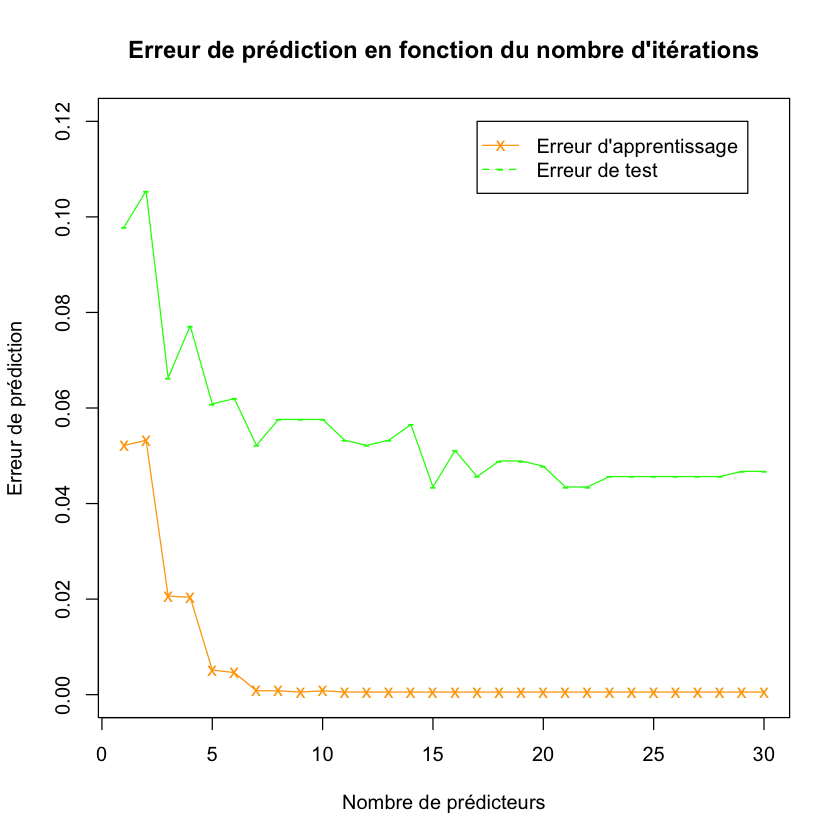

In [330]:
matrice_train <- matrix(ncol=30,nrow=1)
matrice_test <- matrix(ncol=30,nrow=1)
for (i in 1:30){
    model <- adaboost(type~ . , data = data_train, nIter=i)
    pred_train <- predict(model, newdata = data_train)
    pred_test <- predict(model, newdata = data_test)
    matrice_train[i] = pred_train$error
    matrice_test[i] = pred_test$error
    }
x = seq(from = 1, to = 30, by = 1)
plot(x, matrice_train, type="o", col="orange", pch="x", ylim = c(0,0.12), main="Erreur de prédiction en fonction du nombre d'itérations", xlab = "Nombre de prédicteurs", ylab = "Erreur de prédiction")
points(x, matrice_test, col="green", pch="-")
lines(x, matrice_test, col="green")
legend(17,0.12,legend=c("Erreur d'apprentissage","Erreur de test"), col=c("orange","green"),pch=c("x","-"),lty=c(1,2,3), ncol=1)

## 4- Gradient boosting

Le gradient boosting est une technique d' apprentissage automatique pour les problèmes de régression et de classification , qui produit un modèle de prédiction sous la forme d'un ensemble de modèles de prédiction faibles, généralement des arbres de décision . Le gradient construit le modèle par étapes comme le font les autres méthodes de boosting , et il les généralise en permettant l'optimisation d'une fonction de perte arbitrairement différenciable. 

On utilise ici le paquet gbm pour tester le gradient boosting sur nos données.

## Question 5

Refaire la même chose avec gbm qu’avec adaboost. On gardera les paramètres par défaut (distribution Bernouilli, 100 arbres).

Doc R complet : https://cran.r-project.org/web/packages/gbm/gbm.pdf

In [15]:
#Concaténation de data_train et data_test
dataconcat = rbind(data_train,data_test)
dim(dataconcat)

[1] 4601   58

In [16]:
head(dataconcat)

word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_paren,char_freq_bracket,char_freq_exclamation,char_freq_dollar,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,type
0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,1


### Création d'un modèle GBM en utilisant dataconcat

In [17]:
#Fonction qui crée un modèle gbm avec certaines valeurs de paramètres prédéfinies

creation_modele_gbm <- function(gbm_name,n.trees,interaction.depth,shrinkage) {
    set.seed(123) #les données doivent être mélangées avant d'executer gbm
    #train GBM model
    print(system.time(gbm_name <- gbm(
      formula = dataconcat$type~.,
      distribution = "bernoulli",
      data = dataconcat,
      n.trees = n.trees, #NOMBRE D'ITERATIONS 
      interaction.depth = interaction.depth, #PROFONDEUR MAXIMALE DES ARBRES 
      shrinkage = shrinkage, #PARAMETRE DE REGULARISATION A FAIRE VARIER
      train.fraction = 0.8, 
      ))) 
    #print results
    print(gbm_name)
    #affichage graphique de la fonction loss
    n.trees_opt = gbm.perf(gbm_name) #nombre d'itérations optimal
    print(n.trees_opt)
    #Prédiction sur les nouvelles données en utilisant le nombre d'arbres optimal et le type response, 
    #convient plus à la distribution de Bernoulli car transforme chaque résultat en une proba de 0 ou 1
    Yhat_app <- predict(gbm_name, newdata = data_train, n.trees = n.trees_opt, type = "response") #type link par défaut
    Yhat_test <- predict(gbm_name, newdata = data_test, n.trees = n.trees_opt, type = "response") #type link par défaut
    error_app = sum((data_train$type - Yhat_app)^2)/nrow(data_train)
    error_test = sum((data_test$type - Yhat_test)^2)/nrow(data_test)
    cat("Erreur de prédiction sur apprentissage ",error_app)
    cat("\nErreur de prédiction sur test",error_test)
}

La fonction ci-dessus crée un modèle de gradient boosting en utilisant le dataframe dataconcat. Certains paramètres sont prédéfinis :
- formule : dataconcat$type~. (valeur que l'on cherche à prédire => le type de mail est un spam ou non)
- distribution suivant une loi de Bernoulli
- profondeur maximale de chaque arbre (valeur par défaut égale à 1)
- train.fraction à 0.8 : découpe les données de dataconcat en 80% apprentissage et 20% test

Cette fonction prend en argument 4 paramètres à définir lors de l'appel de la fonction :
- gbm_name : nom du modèle de gradient boosting que l'on veut créer
- n.trees : nombre d'itérations
- interaction.depth : profondeur des arbres
- shrinkage : paramètre de régularisation <br>

Cette fonction affiche le temps que la machine met pour créer le modèle, le nombre d'itérations optimal obtenu avec gbm.perf(), ainsi que l'évolution graphique de la déviance de Bernoulli (ou erreur de prédiction) en fonction du nombre d'itérations n.trees.

Ensuite, elle prédit les valeurs pour chaque observation de dataconcat en utilisant les premières itérations n.trees de la séquence de boosting. 

Enfin, elle calcule les erreurs de prédiction sur l'ensemble d'apprentissage et de test.
Testons cette fonction ci-dessous.

   user  system elapsed 
  0.374   0.013   0.393 
gbm(formula = dataconcat$type ~ ., distribution = "bernoulli", 
    data = dataconcat, n.trees = n.trees, interaction.depth = interaction.depth, 
    shrinkage = shrinkage, train.fraction = 0.8)
A gradient boosted model with bernoulli loss function.
100 iterations were performed.
The best test-set iteration was 100.
There were 57 predictors of which 19 had non-zero influence.
[1] 100
Erreur de prédiction sur apprentissage  0.05525967
Erreur de prédiction sur test 0.05776174

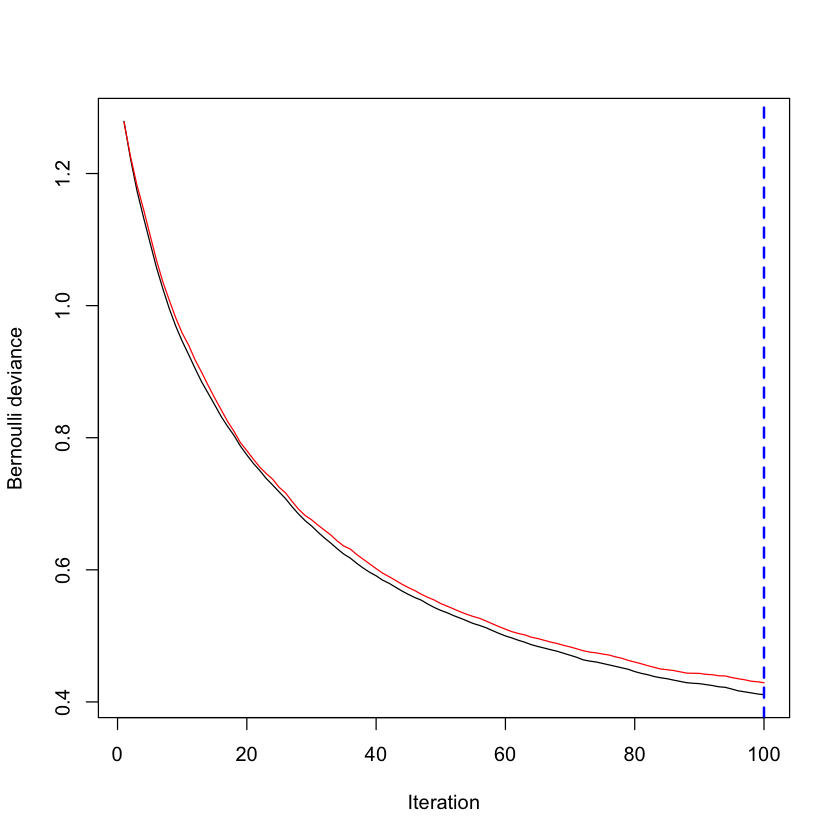

In [18]:
creation_modele_gbm(gbm_1,100,1,0.1) #valeurs des paramètres par défaut

Nous constatons que ce modèle de gradient boosting que nous avons créé avec notre fonction, pour un nombre d'itérations à 100, une profondeur maximale de chaque arbre à 1 et un paramètre de régulatisation à 0.1 (les valeurs par défaut de la fonction gbm), a :
- un nombre d'itérations optimal égal à 100 (nos courbes n'ont pas fini de converger)
- 57 prédicteurs dont 19 ont une influence non nulle
Par ailleurs nous pouvons observer l'évolution de la déviance de Bernoulli en fonction du nombre d'itérations. L'écart entre nos 2 courbes d'apprentissage et de test est très faible, ce modèle est donc très satisfaisant et généralisable.

## Question 6

Etudier l’effet des différents paramètres : nombre d’itérations (arbres), de la profondeur des arbres et du paramètre de régularisation (shrinkage).

### Test 1 : nombre d'itérations n.trees = 100, profondeur des arbres = 2 et paramètre de régularisation shrinkage = 0.1

   user  system elapsed 
  0.705   0.061   0.850 
gbm(formula = dataconcat$type ~ ., distribution = "bernoulli", 
    data = dataconcat, n.trees = n.trees, interaction.depth = interaction.depth, 
    shrinkage = shrinkage, train.fraction = 0.8)
A gradient boosted model with bernoulli loss function.
100 iterations were performed.
The best test-set iteration was 100.
There were 57 predictors of which 28 had non-zero influence.
[1] 100
Erreur de prédiction sur apprentissage  0.04142622
Erreur de prédiction sur test 0.04606953

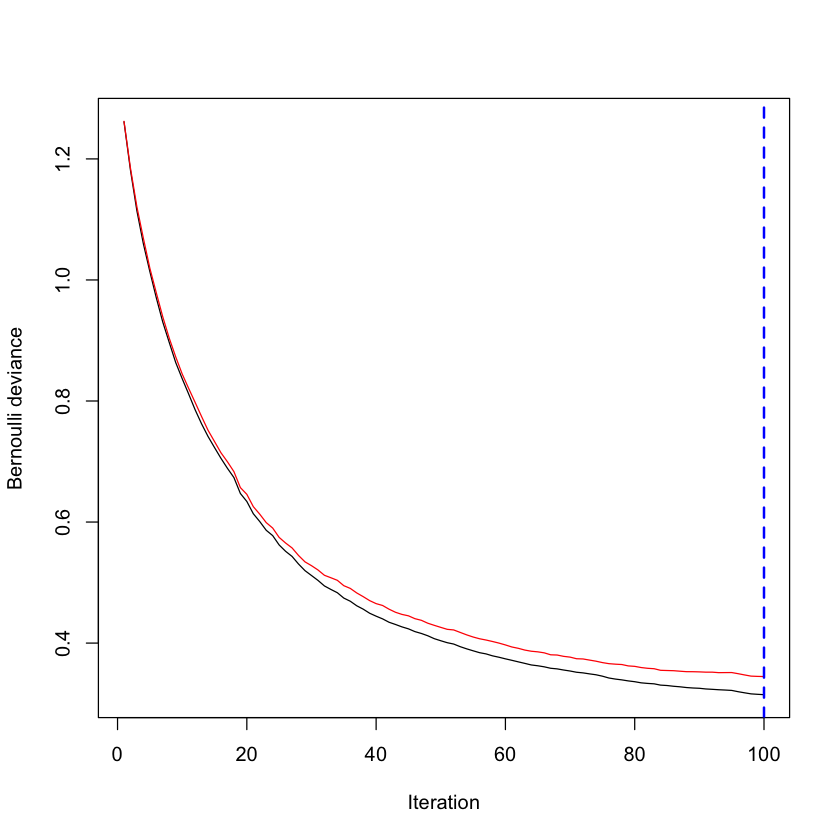

In [397]:
creation_modele_gbm(gbm_2,100,2,0.1)

Nous constatons que ce modèle de gradient boosting que nous avons créé avec notre fonction, avec la même valeur de nombre d'itérations, la même valeur de paramètre de régularisation, une profondeur maximale des arbres plus élevée (=2), donne de meilleurs taux d'erreur de prédiction (plus faible par rapport au 1er modèle ci-dessus).
Par ailleurs, on observe :
- un même nombre d'itérations optimal égal à 100 (nos courbes n'ont pas fini de converger)
- 57 prédicteurs dont 28 ont une influence non nulle. 

Nous pouvons observer l'évolution de la déviance de Bernoulli en fonction du nombre d'itérations. On constate que l'écart entre nos 2 courbes d'apprentissage et de test est un peu plus grand que par rapport à celui du 1er modèle gbm_1. Il reste cependant faible, ce modèle est donc satisfaisant et généralisable.

### Test 2 : nombre d'itérations n.trees = 100, profondeur des arbres = 6 et paramètre de régularisation shrinkage = 0.1

   user  system elapsed 
  1.713   0.029   1.776 
gbm(formula = dataconcat$type ~ ., distribution = "bernoulli", 
    data = dataconcat, n.trees = n.trees, interaction.depth = interaction.depth, 
    shrinkage = shrinkage, train.fraction = 0.8)
A gradient boosted model with bernoulli loss function.
100 iterations were performed.
The best test-set iteration was 99.
There were 57 predictors of which 43 had non-zero influence.
[1] 99
Erreur de prédiction sur apprentissage  0.02651629
Erreur de prédiction sur test 0.03932472

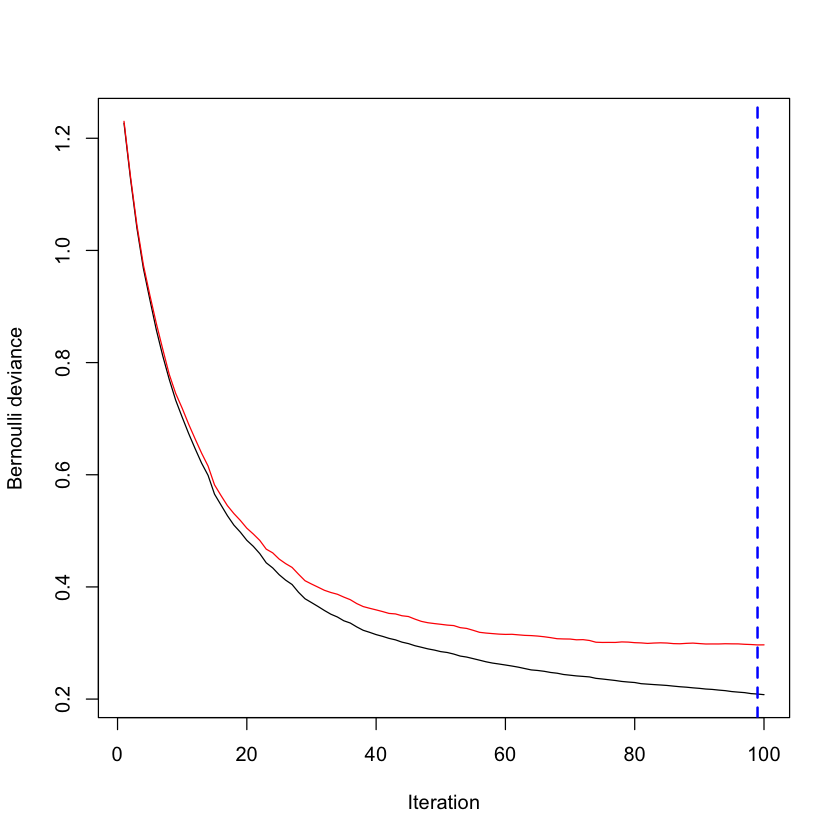

In [400]:
creation_modele_gbm(gbm_3,100,6,0.1) 

Nous constatons que ce modèle de gradient boosting que nous avons créé avec notre fonction, avec la même valeur de nombre d'itérations, la même valeur de paramètre de régularisation, une profondeur des arbres plus élevée (=6), donne de meilleurs taux d'erreur de prédiction (plus faible par rapport aux deux modèles ci-dessus).
Par ailleurs, on observe :
- un même nombre d'itérations optimal égal à 99
- un nombre de variables ayant une influence non-nulle plus élevé : 43 

Nous pouvons observer l'évolution de la déviance de Bernoulli en fonction du nombre d'itérations. On constate que l'écart entre nos 2 courbes d'apprentissage et de test devient de plus en plus grand au fur et à mesure que le nombre d'itérations augmente. Par conséquent on peut déduire qu'un nombre trop élevé de profondeur maximale des arbres pourrait entrainer un surapprentissage et une mauvaise généralisation du modèle.

### Test 3 : nombre d'itérations n.trees = 100, profondeur des arbres = 1 et paramètre de régularisation shrinkage = 0.01

   user  system elapsed 
  0.445   0.058   0.605 
gbm(formula = dataconcat$type ~ ., distribution = "bernoulli", 
    data = dataconcat, n.trees = n.trees, interaction.depth = interaction.depth, 
    shrinkage = shrinkage, train.fraction = 0.8)
A gradient boosted model with bernoulli loss function.
100 iterations were performed.
The best test-set iteration was 100.
There were 57 predictors of which 6 had non-zero influence.
[1] 100
Erreur de prédiction sur apprentissage  0.1482157
Erreur de prédiction sur test 0.1509919

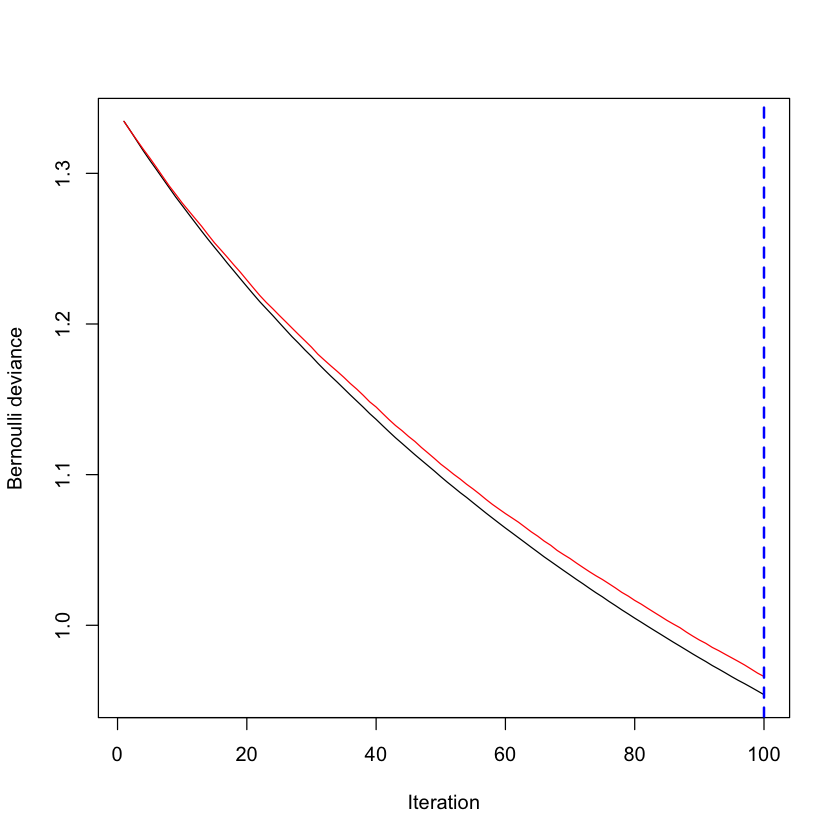

In [401]:
creation_modele_gbm(gbm_4,100,1,0.01) 

On constate ici que le paramètre de régularisation influt fortement sur le modèle. Comme il est très petit ici, notre modèle met plus de temps à converger. Même si les erreus de prédiction obtenues sont très faibles, ce modèle n'est pas généralisable car la valeur choisie du paramètre de régularisation est trop petite.

### Test 4 : nombre d'itérations n.trees = 100, profondeur des arbres = 1 et paramètre de régularisation shrinkage = 0.9

   user  system elapsed 
  0.394   0.013   0.423 
gbm(formula = dataconcat$type ~ ., distribution = "bernoulli", 
    data = dataconcat, n.trees = n.trees, interaction.depth = interaction.depth, 
    shrinkage = shrinkage, train.fraction = 0.8)
A gradient boosted model with bernoulli loss function.
100 iterations were performed.
The best test-set iteration was 36.
There were 57 predictors of which 25 had non-zero influence.
[1] 36
Erreur de prédiction sur apprentissage  0.04034989
Erreur de prédiction sur test 0.05148571

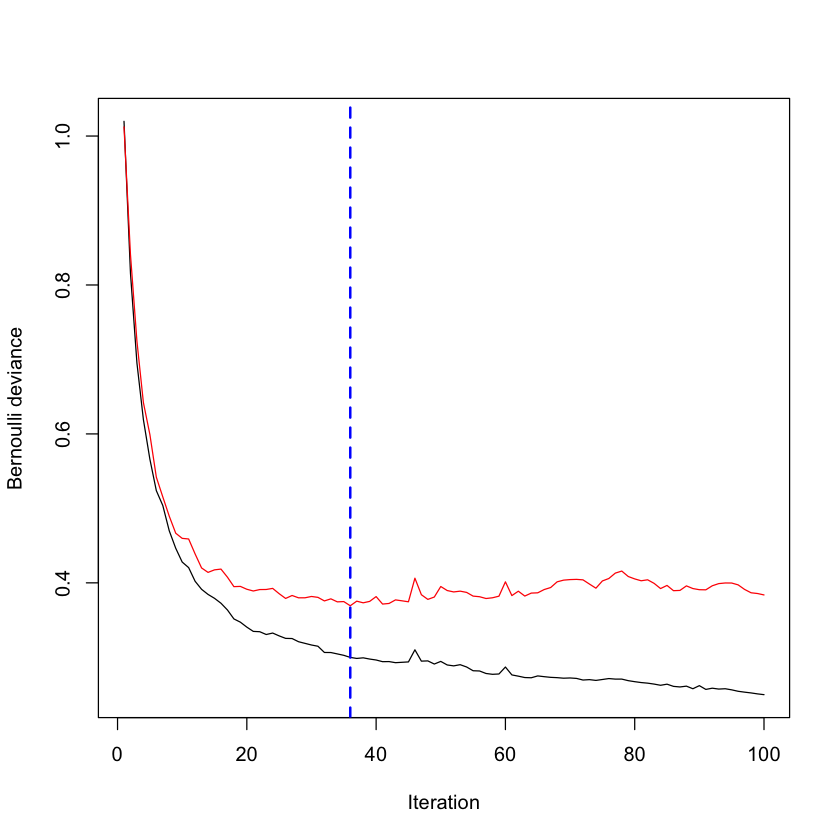

In [408]:
creation_modele_gbm(gbm_5,100,1,0.9)

On constate qu'un paramètre de régularisation trop élevé ne donne pas un bon modèle car la descente de gradient se fait trop vite et l'écart entre l'erreur de prédiction sur les données de test et d'apprentissage s'agrandit dès la 10ème itération. Ce modèle n'est pas généralisable.

### Test 5 : nombre d'itérations n.trees = 200, profondeur des arbres = 1 et paramètre de régularisation shrinkage = 0.1

   user  system elapsed 
  1.050   0.047   1.125 
gbm(formula = dataconcat$type ~ ., distribution = "bernoulli", 
    data = dataconcat, n.trees = n.trees, interaction.depth = interaction.depth, 
    shrinkage = shrinkage, train.fraction = 0.8)
A gradient boosted model with bernoulli loss function.
300 iterations were performed.
The best test-set iteration was 294.
There were 57 predictors of which 37 had non-zero influence.
[1] 294
Erreur de prédiction sur apprentissage  0.03917287
Erreur de prédiction sur test 0.04476619

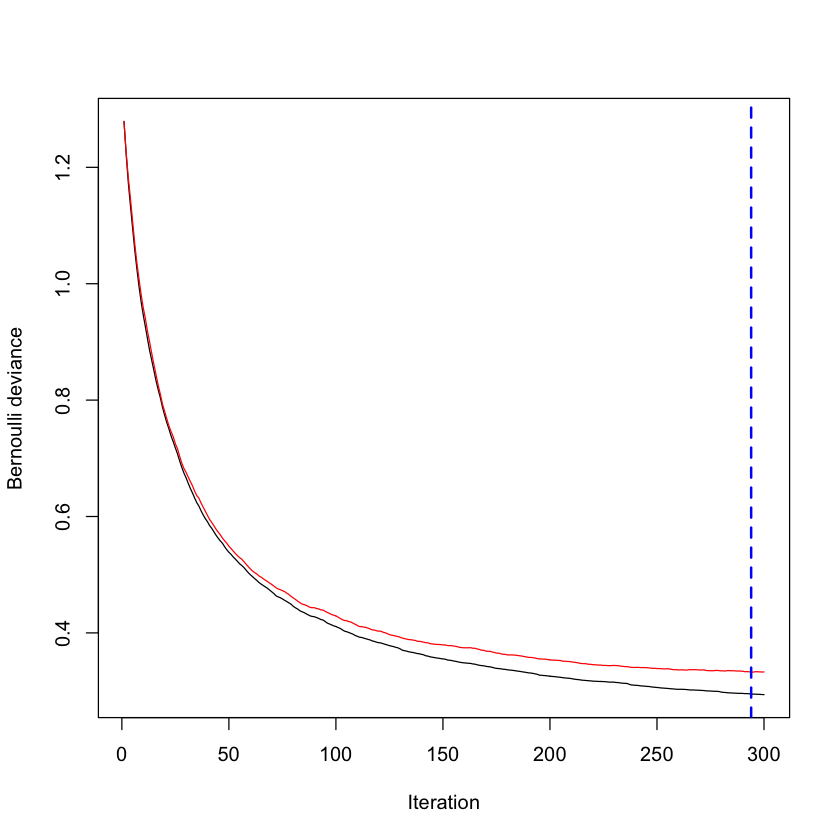

In [407]:
creation_modele_gbm(gbm_6,300,1,0.1)

On constate qu'un plus grand nombre d'itérations améliore la qualité de la prédiction (diminue les valeurs des erreurs). L'écart entre la courbe de test et la courbe d'apprentissage reste très faible. Le meilleur nombre d'itérations est 294 et seulement 37 variables sur 57 ont une influence non-nulle. Ce modèle est satisfaisant et généralisable.

### Test 6 : nombre d'itérations n.trees = 500, profondeur des arbres = 1 et paramètre de régularisation shrinkage = 0.1

   user  system elapsed 
  1.836   0.033   1.956 
gbm(formula = dataconcat$type ~ ., distribution = "bernoulli", 
    data = dataconcat, n.trees = n.trees, interaction.depth = interaction.depth, 
    shrinkage = shrinkage, train.fraction = 0.8)
A gradient boosted model with bernoulli loss function.
500 iterations were performed.
The best test-set iteration was 493.
There were 57 predictors of which 42 had non-zero influence.
[1] 493
Erreur de prédiction sur apprentissage  0.03341676
Erreur de prédiction sur test 0.04234766

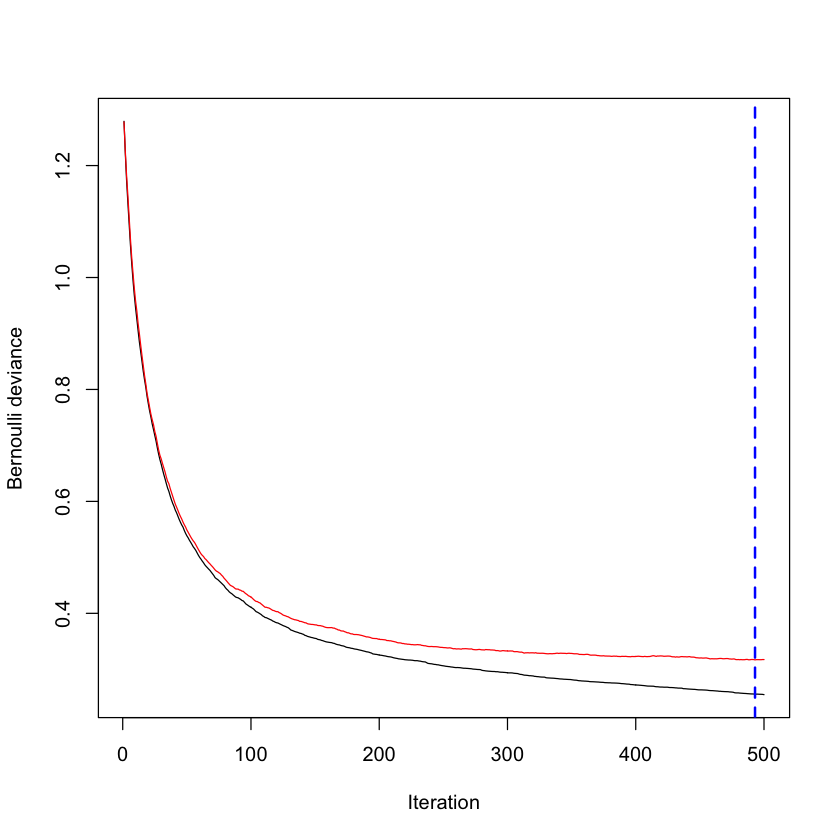

In [409]:
creation_modele_gbm(gbm_7,500,1,0.1)

On constate avec cet exemple que le nombre d'itérations ne doit pas être trop élevé pour ne pas faire de surapprentissage, auquel cas le modèle ne sera pas généralisable.

Une meilleure option que de modifier manuellement les hyperparamètres un par un consiste à effectuer une recherche dans une grille qui itère sur chaque combinaison de valeurs d'hyperparamètres et nous permet d'évaluer quelle combinaison a tendance à bien fonctionner. Pour effectuer une recherche de grille manuelle, nous allons d'abord construire notre grille de combinaisons hyperparamétriques. 

In [20]:
#Création d'une grille d'hyperparamètres
hyper_grid <- expand.grid(
    n.trees = c(10, 50, 150, 200, 250),
    shrinkage = c(.001, .001, .01, .1, .3),
    interaction.depth = c(1, 2, 3, 4, 5)
)
nrow(hyper_grid)

[1] 125

Nous allons rechercher parmi ces 125 modèles le nombre d'itérations, la profondeur des arbres et le paramètre de régularisation optimaux. 

In [23]:
# grid search 
for(i in 1:nrow(hyper_grid)){
    # reproducibility
    set.seed(123)
  
    # train model
    gbm.tune <- gbm(
        formula = dataconcat$type~.,
        distribution = "bernoulli",
        data = dataconcat,
        n.trees = hyper_grid$n.trees[i], #NOMBRE D ITERATIONS 
        interaction.depth = hyper_grid$interaction.depth[i], #PROFONDEUR DES ARBRES
        shrinkage = hyper_grid$shrinkage[i], #PARAMETRE DE REGULARISATION
        train.fraction = 0.8)

        #add min training error and trees to grid
        hyper_grid$optimal_trees[i] <- which.min(gbm.tune$valid.error)
        hyper_grid$min_Error[i] <- min(gbm.tune$valid.error)}
    

valid.error : un vecteur de longueur égal au nombre d'arbres ajustés contenant la valeur de la fonction de perte pour chaque itération de boosting évaluée sur les données de validation


In [24]:
dim(hyper_grid)

[1] 125   5

In [25]:
head(hyper_grid)

n.trees,shrinkage,interaction.depth,optimal_trees,min_Error
10,0.001,1,10,1.334658
50,0.001,1,50,1.310402
150,0.001,1,150,1.255695
200,0.001,1,200,1.230626
250,0.001,1,250,1.207522
10,0.001,1,10,1.334658


In [26]:
#affiche la grille hyper_grid avec filtre croissant sur colonne min_Error
head(hyper_grid[order(hyper_grid[,5],decreasing=F), ]) 


,n.trees,shrinkage,interaction.depth,optimal_trees,min_Error
95,250,0.1,4,250,0.2831418
120,250,0.1,5,250,0.2887527
118,150,0.1,5,136,0.2911125
119,200,0.1,5,136,0.2911125
94,200,0.1,4,197,0.2921000
75,250,0.3,3,214,0.2922648


Les hyperparamètres qui minimisent l'erreur de validation sur nos données de validation (ici les données de test) sont : 
- n.trees = 250
- shrinkage = 0.1
- interaction.depth = 4
- optimal_trees = 250
- min_Error = 0.28

On peut par conséquent modifier notre fonction en lui donnant ces nouvelles valeurs optimales d'hyperparamètres.

In [28]:
#Fonction qui crée un modele gbm optimal

creation_modele_gbm_optimal <- function(gbm_name) {
    set.seed(123) #les donnees doivent etre mélangées avant d'executer gbm
    #train GBM model optimal
    print(system.time(gbm_name <- gbm(
      formula = dataconcat$type~.,
      distribution = "bernoulli",
      data = dataconcat,
      n.trees = 250, #NOMBRE D ITERATIONS 
      interaction.depth = 4, #PROFONDEUR DES ARBRES 
      shrinkage = 0.1, #PARAMETRE DE REGULARISATION 
      train.fraction = 0.8, 
      ))) 
    #print results
    print(gbm_name)
    #affichage graphique de la fonction loss
    n.trees_opt = gbm.perf(gbm_name) #nombre d'itérations optimal
    print(n.trees_opt)
    #Prédiction sur les nouvelles données en utilisant le nombre d'arbres optimal et le type response, 
    #convient plus à la distribution de Bernoulli car transforme chaque résultat en une proba de 0 ou 1
    Yhat_app_opt <- predict(gbm_name, newdata = data_train, n.trees = n.trees_opt, type = "response") #type link par défaut
    Yhat_test_opt <- predict(gbm_name, newdata = data_test, n.trees = n.trees_opt, type = "response") #type link par défaut
    error_app = sum((data_train$type - Yhat_app_opt)^2)/nrow(data_train)
    error_test = sum((data_test$type - Yhat_test_opt)^2)/nrow(data_test)
    cat("Erreur de prédiction sur apprentissage ",error_app)
    cat("\nErreur de prédiction sur test",error_test)
}

   user  system elapsed 
  2.686   0.007   2.704 
gbm(formula = dataconcat$type ~ ., distribution = "bernoulli", 
    data = dataconcat, n.trees = 250, interaction.depth = 4, 
    shrinkage = 0.1, train.fraction = 0.8)
A gradient boosted model with bernoulli loss function.
250 iterations were performed.
The best test-set iteration was 250.
There were 57 predictors of which 49 had non-zero influence.
[1] 250
Erreur de prédiction sur apprentissage  0.01993009
Erreur de prédiction sur test 0.0386314

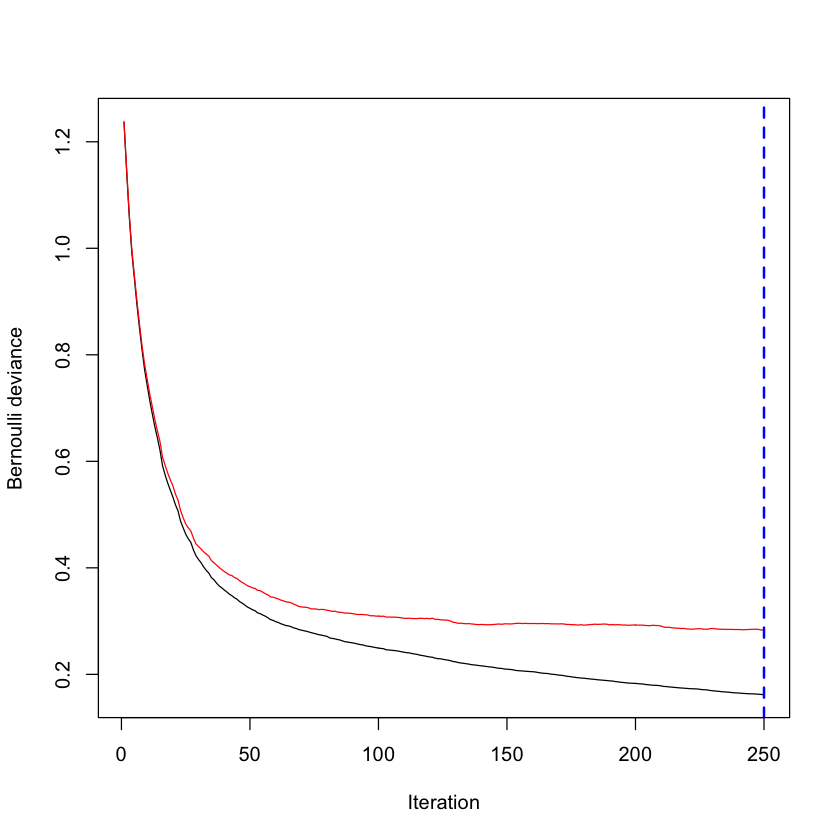

In [29]:
creation_modele_gbm_optimal(gbm_optimal_1)

Ce modèle est très satisfaisant et généralisable car il minimise les erreurs de prédiction (1.99% sur les données d'apprentissage et 3.86% sur les données de test)

Etudions les prédictions obtenues avec ce modèle optimal.

   user  system elapsed 
  2.671   0.006   2.686 
gbm(formula = dataconcat$type ~ ., distribution = "bernoulli", 
    data = dataconcat, n.trees = 250, interaction.depth = 4, 
    shrinkage = 0.1, train.fraction = 0.8)
A gradient boosted model with bernoulli loss function.
250 iterations were performed.
The best test-set iteration was 242.
There were 57 predictors of which 47 had non-zero influence.
[1] 242
Erreur de prédiction sur apprentissage  0.01937418
Erreur de prédiction sur test 0.03863031

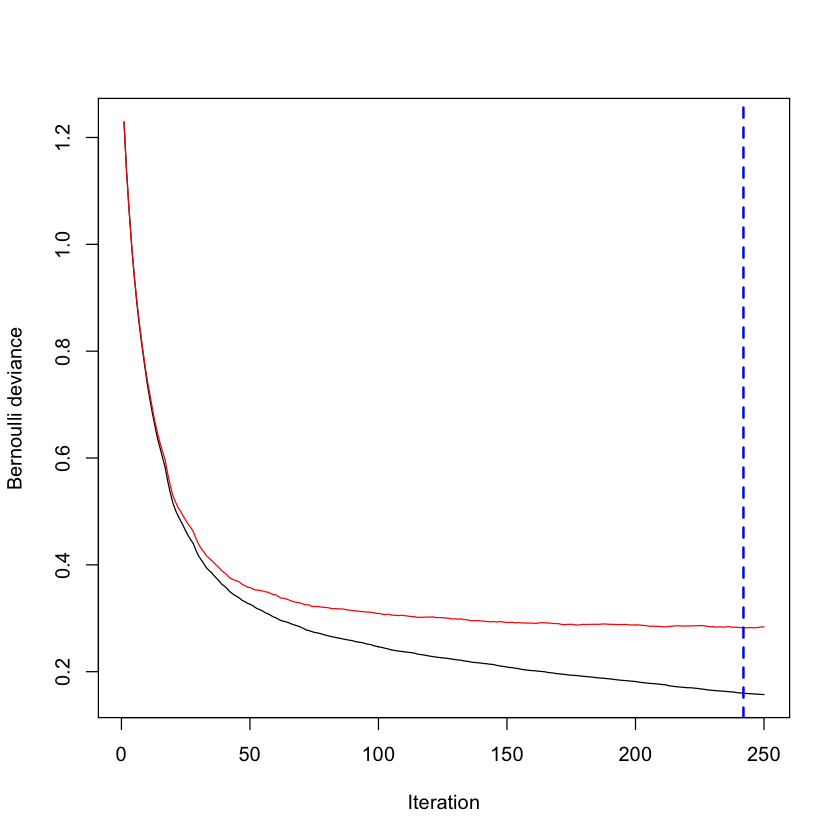

In [30]:
print(system.time(gbm_optimal <- gbm(
      formula = dataconcat$type~.,
      distribution = "bernoulli",
      data = dataconcat,
      n.trees = 250, #NOMBRE D'ITERATIONS 
      interaction.depth = 4, #PROFONDEUR DES ARBRES 
      shrinkage = 0.1, #PARAMETRE DE REGULARISATION 
      train.fraction = 0.8,
      ))) 
    #print results
    print(gbm_optimal)
    #affichage graphique de la fonction loss
    n.trees_opt = gbm.perf(gbm_optimal) #nombre d'itérations optimal
    print(n.trees_opt)
    #Prédiction sur les nouvelles données en utilisant le nombre d'arbres optimal et le type response, 
    #convient plus à la distribution de Bernoulli car transforme chaque résultat en une proba de 0 ou 1    
    Yhat_app_opt <- predict(gbm_optimal, newdata = data_train, n.trees = n.trees_opt, type = "response") #type link par défaut 
    Yhat_test_opt <- predict(gbm_optimal, newdata = data_test, n.trees = n.trees_opt, type = "response") #type link par défaut
    error_app = sum((data_train$type - Yhat_app_opt)^2)/nrow(data_train)
    error_test = sum((data_test$type - Yhat_test_opt)^2)/nrow(data_test)
    cat("Erreur de prédiction sur apprentissage ",error_app)
    cat("\nErreur de prédiction sur test",error_test)

In [32]:
length(Yhat_test_opt) #prediction sur les valeurs de test

[1] 920

In [50]:
round(Yhat_test_opt[1:100],0) #affiche les 100 premières valeurs, nous avons bien des 0 et des 1, plus grosse proportion de 0 que de 1 ce qui est normal

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1

## Question 7

Pour conclure, quel modèle pensez-vous être le meilleur? On pourra prendre aussi en compte le temps de calcul. Quelles sont les variables qui ont le plus d’influence sur le modèle retenu ?

### Tableau récapitulatif des résultats obtenus aux différents tests

In [36]:
recap <-read.table('/Users/winnievorihilala/Documents/INSA/STAT/tab_recap_2.csv', sep=',', header=TRUE)

In [37]:
recap

Test,Nom_du_modèle,n_trees,interaction_depth,shrinkage,error_app_pourcentage,error_test_pourcentage,User_time_s,Nombre_d_arbre_optimal,Nombre_de_variable_d_influence_non_nulle,Qualite_du_modèle_B_ou_M
Test initial,gbm_1,100,1,"0,1","5,52","5,78","0,7",100,19,Bon
Test 1,gbm_2,100,2,"0,1","4,14","4,6","1,7",100,28,Bon
Test 2,gbm_3,100,6,"0,1","2,65","3,93","0,4",99,43,Bon
Test 3,gbm_4,100,1,"0,01","1,48","1,5","3,9",100,6,Mauvais
Test 4,gbm_5,100,1,"0,9","4,03","5,14","1,05",36,25,Mauvais
Test 5,gbm_6,300,1,"0,1","3,92","4,48","1,8",294,37,Bon
Test 6,gbm_7,500,1,"0,1","3,34","4,23","2,9",493,42,Bon
Test (grid search),gbm_optimal,250,4,"0,1","1,94","3,86","0,4",232,49,Bon


Voici ci-dessus un tableau récapitulatif des différents résultats obtenus. <br>

Compte tenu de la question 1, nous devions trouver des modèles qui font mieux que le taux d’erreur du classifieur constant qui sert de référence. Autrement dit, un bon modèle doit faire moins de 40% de taux d'erreur de prédiction. Tous nos modèles ici présentent des taux d'erreur de prédiction largement inférieurs à ce taux d'erreur du classifieur) 

Compte tenu de ces résultats et des taux d'erreurs obtenus sur les données de test, c'est le modèle gbm_optimal qui est le meilleur. 

Le modèle gbm_4 donne le taux d'erreur de prédiction le plus faible (1.5%), cependant ce modèle est mauvais car le paramètre de régularisation est trop faible et le modèle ne converge pas comme on a pu le constater dans le graphique. <br>

Il est important d'effectuer une recherche par grille afin de tester plusieurs valeurs des hyperparamètres et trouver les valeurs optimales qui minimisent les erreurs de prédiction, particulièrement l'erreur de généralisation (erreur_test). <br>
Les 3 paramètres influent fortement sur le modèle. Le nombre d'itérations ne doit pas être trop grand pour ne pas surapprendre le modèle, le paramètre de régularisation ne doit pas être ni trop petit (la descente du gradient serait trop lente et mettrait beaucoup de temps avant de converger) ni trop grand (la descente du gradient risque de se faire trop rapidement au risque de diverger. Il faut retenir que plus shrinkage est petit, plus le nombre d'itérations doit être grand. Enfin, la profondeur des arbres doit être ni trop grande ni trop petite également afin d'obtenir un modèle optimal. <br>

En amélioration du modèle optimal trouvé ci-dessus (gbm_optimal), nous pourrions tester la validation croisée. La fonction gbm a un paramètre cv.folds qui permet d'effectuer cela facilement. Ce paramètre prend 0 par défaut. <br>

Il serait également intéressant d'effectuer la même chose avec xgboost et de comparer les performances obtenues avec celles obtenues en utilisant gbm.

Les variables qui ont le plus d'influence sur le modèle obtenu sont affichées ci-dessous :

,var,rel.inf
char_freq_dollar,char_freq_dollar,21.991541
char_freq_exclamation,char_freq_exclamation,18.185087
word_freq_remove,word_freq_remove,12.149474
word_freq_hp,word_freq_hp,8.724957
word_freq_free,word_freq_free,6.475950
capital_run_length_average,capital_run_length_average,6.313734
word_freq_your,word_freq_your,3.927179
capital_run_length_longest,capital_run_length_longest,2.771935
word_freq_george,word_freq_george,2.531380
word_freq_our,word_freq_our,2.268537


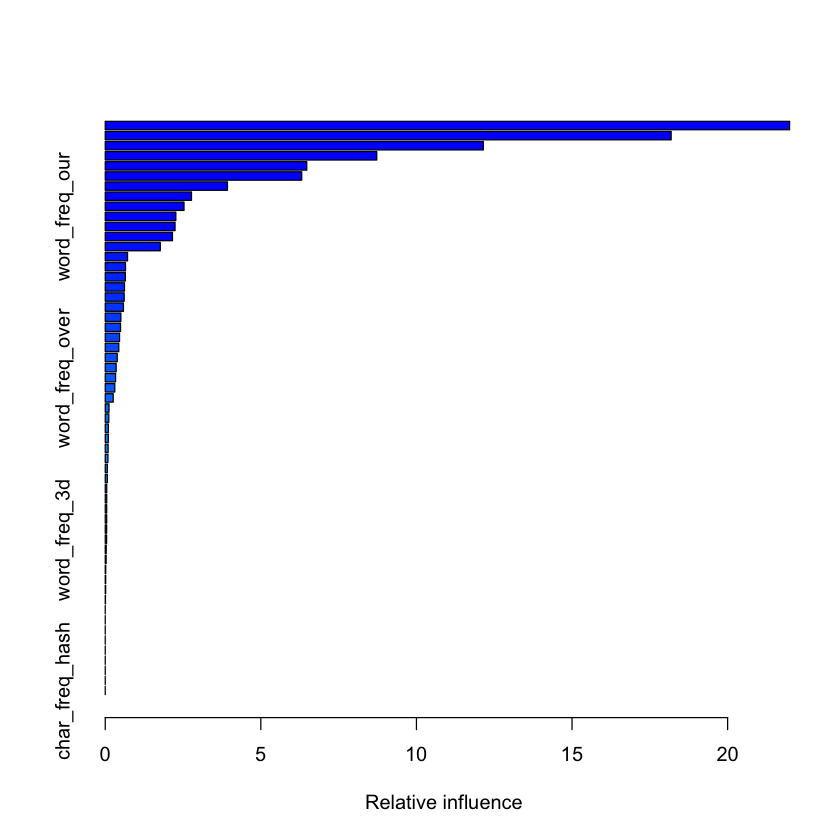

In [39]:
summary(gbm_optimal)[1:10,] #renvoie l'importance globale des prédicteurs (leur importance moyenne sur toutes les classes)
